In [ ]:
# 지도 학습은 분류와 회귀로 나뉨

In [ ]:
import numpy as np

In [ ]:
# 농어의 무게와 길이

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

In [ ]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
import matplotlib.pyplot as plt  # 그래프를 그리기 위해 맷플롭립 임포트

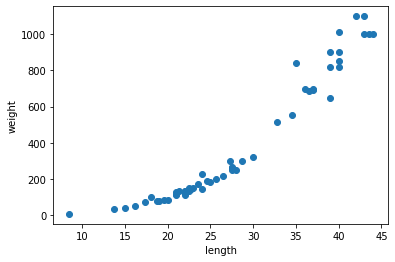

In [8]:
plt.scatter(perch_length, perch_weight)  # 산점도를 그리기 위해 scatter 함수 길이가 x축, 무게가 y축
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split # 훈련 세트와 테스트 세트를 나누기 위해 사이킷런에서 함수를 불러온다
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 이번 연습에서는 input이 길이, target이 무게이다. random_state 함수는 시드값으로 실습과 책의 값이 같게하기 위해서 설정한 값이다.


In [15]:
#scikit-learn에서 사용할 훈련세트는 2차원 배열이여야한다.

In [12]:
test_array = np.array([1,2,3,4]) # 현재는 1차원인 상태, 넘파이에서 배열의 크기는 파이썬의 튜플 형태로 표현한다.
print(test_array.shape)

(4,)


In [13]:
test_array = test_array.reshape(2, 2)  # 2행 2열인 2차원 배열로 바뀌었다.
print(test_array.shape)

(2, 2)


In [14]:
# reshape() 메서드는 원본 배열의 원소 개수가 다르면 안된다.
# ex) (4, ) 크기의 1차원 배열을 (2, 3) 크기의 2차원 배열로 바꾸기에는 원소의 개수가 맞지 않아 오류가 발생한다.

In [22]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape )
# 여기서 -1을 넣는 이유는 -1을 넣으면 크기를 기억하지 않아도 알아서 자동으로 크기에 맞추어 변형해준다.

(42, 1) (14, 1)


In [24]:
from sklearn.neighbors import KNeighborsRegressor  # 사이킷런의 k-최근접 이웃 회귀 알고리즘 클래스
knr = KNeighborsRegressor()
knr.fit(train_input, train_target) # fit은 훈련

KNeighborsRegressor()

In [26]:
print(knr.score(test_input, test_target)) # 분류에서는 정확도 점수, 회귀에서는 결정계수 = R * R

0.992809406101064


In [27]:
# R * R = (타깃 - 예측)*(타깃 - 예측)의 합 / (타깃 - 평균)*(타깃 - 평균)의 합

In [28]:
# 결정계수가 1에 가까우면 예측이 타깃과 아주 가까운것이다.

In [29]:
from sklearn.metrics import mean_absolute_error  # sklearn.metrics 패키지는 여러 가지 측정 도구를 제공한다.
# mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [30]:
# 여기서는 19g 정도 차이가 난다.

In [31]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [32]:
# 훈련세트보다 테스트 세트의 점수가 높으니 과소적합

In [33]:
# 사이킷 런의 k-최근접 이웃 알고리즘의 기본 k 값은 5 이를 3으로 낮춘다. 이러면 모델이 좀 더 복잡해질 것이다.

In [34]:
knr.n_neighbors = 3

In [35]:
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [36]:
print(knr.score(test_input, test_target))

0.9746459963987609


In [37]:
# 훈련 세트의 점수가 높아지고 테스트 세트의 점수는 낮아졌지만 둘 사이의 차이가 그렇게 크지 않으므로 과속적합은 해결되었고 과대적합이지도 않다.

In [39]:
# 과대적합일 경우 모델을 덜 복잡하게 만들기 위해 k의 값을 늘린다.
# 과속적합일 경우 모델을 더 복잡하게 만들기 위해 k의 값을 줄인다.

In [40]:
# 과대적합 : 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁜 경우
# 과소적합 : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우